# Employee Attrition Prediction



In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### read CSV

In [383]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [384]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [385]:
df.head(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN
5,5,32.0,No,NaN,1005.0,Research & Development,2.0,2.0,NaN,1.0,...,3.0,80.0,0.0,NaN,2.0,NaN,7.0,7.0,NaN,NaN
6,6,NaN,No,NaN,NaN,Research & Development,3.0,3.0,Medical,NaN,...,NaN,80.0,3.0,12.0,3.0,NaN,1.0,NaN,0.0,0.0
7,7,30.0,No,Travel_Rarely,1358.0,Research & Development,24.0,1.0,Life Sciences,1.0,...,2.0,80.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
8,8,38.0,No,Travel_Frequently,216.0,Research & Development,NaN,3.0,Life Sciences,1.0,...,NaN,NaN,0.0,10.0,2.0,3.0,9.0,7.0,1.0,8.0
9,9,NaN,No,Travel_Rarely,1299.0,Research & Development,NaN,3.0,NaN,1.0,...,2.0,80.0,2.0,17.0,3.0,2.0,7.0,7.0,NaN,7.0


### Feature transformation

In [386]:
df.loc[df["Attrition"] == "No", "Attrition"] = 0.0
df.loc[df["Attrition"] == "Yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']



# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col]=pd.Categorical(df[col]).codes
# HANDLE NULL NUMBERS
# INSERT CODE HERE

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

c:\Users\theepob\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [387]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,NaN,-1,1.0,NaN,1,2.0,0,...,NaN,1.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0,-1,279.0,1,NaN,NaN,1,3.0,1,...,NaN,4.0,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,NaN,1,...,3.0,NaN,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0,1,1392.0,1,3.0,4.0,1,NaN,0,...,3.0,3.0,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0,2,591.0,1,2.0,1.0,3,1.0,1,...,3.0,4.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN
5,32.0,0,-1,1005.0,1,2.0,2.0,-1,NaN,1,...,3.0,3.0,0.0,NaN,2.0,NaN,7.0,7.0,NaN,NaN
6,NaN,0,-1,NaN,1,3.0,3.0,3,3.0,0,...,4.0,NaN,3.0,12.0,3.0,NaN,1.0,NaN,0.0,0.0
7,30.0,0,2,1358.0,1,24.0,1.0,1,NaN,-1,...,4.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
8,38.0,0,1,216.0,1,NaN,3.0,1,4.0,1,...,4.0,NaN,0.0,10.0,2.0,3.0,9.0,7.0,1.0,8.0
9,NaN,0,2,1299.0,1,NaN,3.0,-1,3.0,1,...,3.0,2.0,2.0,17.0,3.0,2.0,7.0,7.0,NaN,7.0


###  Spliting data into train and test

In [388]:
from sklearn.model_selection import train_test_split

In [389]:
X_train, X_test, y_train, y_test=train_test_split(df.loc[:, ~df.columns.isin(['Attrition'])],df["Attrition"],test_size=0.1,shuffle=False)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test ", y_test.shape)

X_train (1323, 30)
X_test (147, 30)
y_train (1323,)
y_test  (147,)


### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

### Display histogram of each feature

In [390]:
def display_histogram(df, col_name, n_bin = 40):
    for col in col_name:
        plt.hist(df[col],n_bin,edgecolor="blue")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

T4


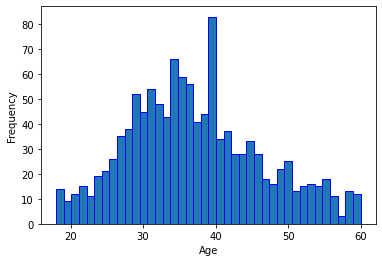

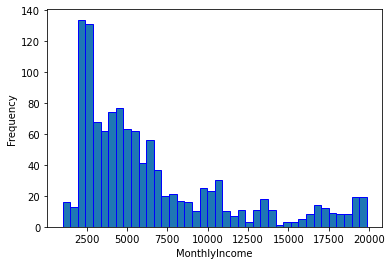

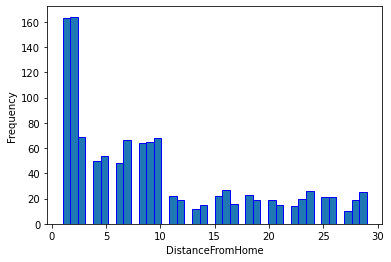

In [391]:
print("T4")
display_histogram(df,["Age","MonthlyIncome","DistanceFromHome"])

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

ANS: Ageสามารถใช้Gaussianได้เพราะโค้งค่อนข้างเข้สรูปแบบGaussian แต่MonthlyIncomeกับDistanceFromHomeไม่ได้ อาจต้องใช้ distributionอื่น หรือใช้ GMM มาสร้างโค้งที่เข้ารูปกับข้อมูล                                                   

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

bin = 10


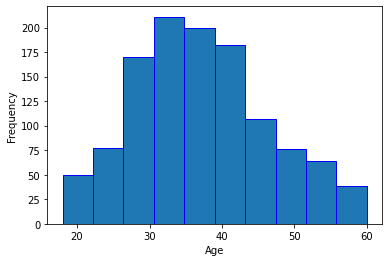

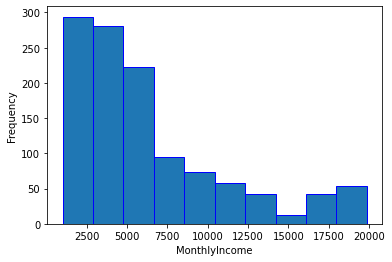

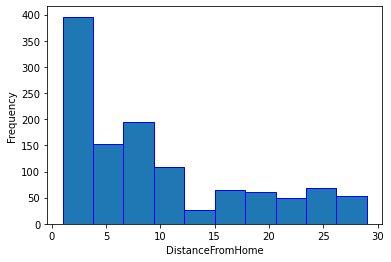

--------------------------------------------------------------------------------
bin = 40


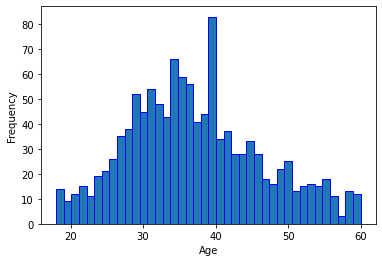

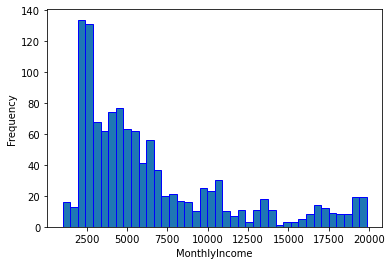

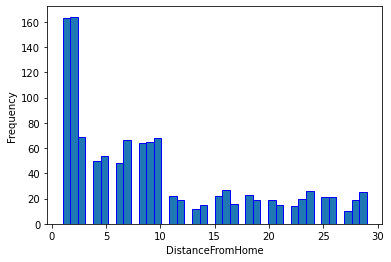

--------------------------------------------------------------------------------
bin = 100


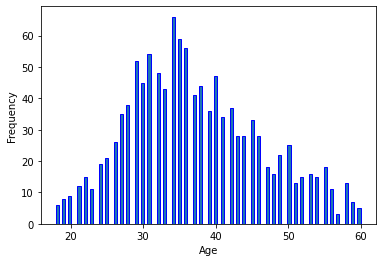

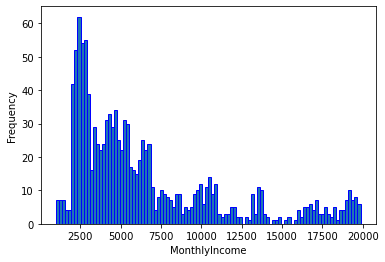

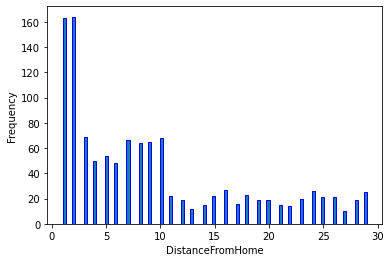

--------------------------------------------------------------------------------


In [392]:
bins=[10,40,100]
for bin in bins:
    print("bin =",bin)
    display_histogram(df,["Age","MonthlyIncome","DistanceFromHome"],bin)
    print("--------------------------------------------------------------------------------")
    

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

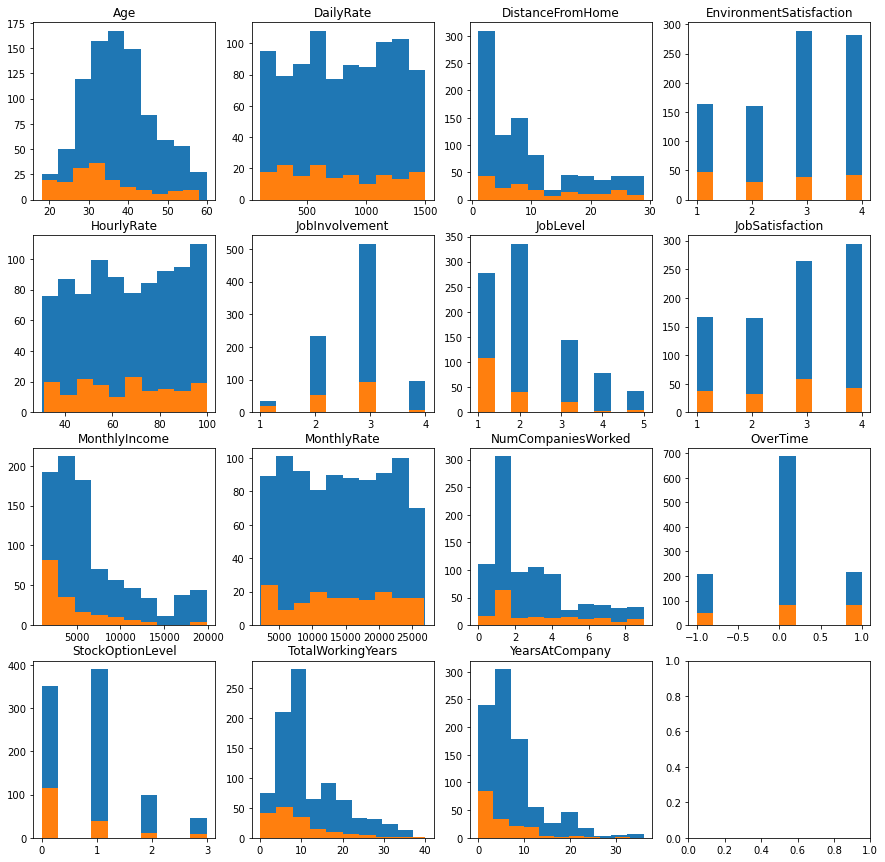

In [393]:
def display_histogram2(df, col_name, cls, n_bin = 40):
 df_col_no_nan = df[~np.isnan(df[col])]
 cls.hist(df_col_no_nan[col_name], bins=n_bin)
 cls.set_title(col_name)

selected = ["Age", "DailyRate", "DistanceFromHome", "EnvironmentSatisfaction", "HourlyRate",
 "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate",
 "NumCompaniesWorked", "OverTime", "StockOptionLevel", "TotalWorkingYears", "YearsAtCompany"]

train, test = train_test_split(df, train_size=0.9, stratify=df["Attrition"])
train_stay = train.loc[train["Attrition"] == 0.0].copy()
train_leave = train.loc[train["Attrition"] == 1.0].copy()
fig, ax = plt.subplots(4, 4, figsize=(15, 15))
for i in range(4):
 for j in range(4):
    if (4 * i + j >= len(selected)): break
    display_histogram2(train_stay, selected[4 * i + j], ax[i, j], 10)
    display_histogram2(train_leave, selected[4 * i + j], ax[i, j], 10)

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

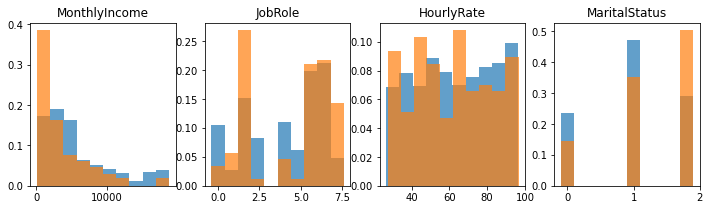

In [394]:
def divide_into_bins(data, n_bin):
 mn = np.nanmin(data)
 mx = np.nanmax(data)
 bin_size = (mx - mn) / n_bin
 bins = np.append(np.append(-np.inf, np.arange(mn, mx, bin_size)), np.inf)
 idx = np.digitize(data, bins)
 bin_cnt = np.bincount(idx)
 while (bin_cnt.shape[0] - 1 < bins.shape[0]):
    bin_cnt = np.append(bin_cnt, 0)
 bin_cnt = bin_cnt / np.sum(bin_cnt)

 return bins, bin_cnt, bin_size
def display_histogram_probs(bins, bin_cnt, cls, bin_size):
 cls.bar(bins[1:-1], bin_cnt[2:-1], width=bin_size, alpha=0.7)
 cls.set_title(col_name)


col_names = ["MonthlyIncome", "JobRole", "HourlyRate", "MaritalStatus"]
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for j in range(4):
 col_name = col_names[j]
 stay_bins, stay_bin_cnt, stay_bin_size = divide_into_bins(train_stay[col_name], 10)
 leave_bins, leave_bin_cnt, leave_bin_size = divide_into_bins(train_leave[col_name], 10)
 stay_bins, stay_bin_cnt, stay_bin_size = divide_into_bins(train_stay[col_name][train_stay[col_name] != -1], 10)
 leave_bins, leave_bin_cnt, leave_bin_size = divide_into_bins(train_leave[col_name][train_leave[col_name] != -1], 10)
 display_histogram_probs(stay_bins, stay_bin_cnt, ax[j], stay_bin_size)
 display_histogram_probs(leave_bins, leave_bin_cnt, ax[j], leave_bin_size)

### T9. What is the prior distribution of the two classes?

In [395]:
def get_prior(df, value):
  return df.loc[df["Attrition"] == value, "Attrition"].count() / df.shape[0]

p_leave = get_prior(df, 1)
p_stay = get_prior(df, 0)
print("Prior(leave):", p_leave)
print("Prior(stay):", p_stay)

Prior(leave): 0.16122448979591836
Prior(stay): 0.8387755102040816


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

ANS : 1)flooring : ถ้าเป็น 0 ให้เปลี่ยนเป็น ค่าที่น้อยมากๆแทนเช่น 1e-10
      2)smoothing : เกลี่ยค่าจากข้างมา

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [396]:
class SimpleBayesClassifier:

    def __init__(self, n_pos, n_neg):
        
        """
        Initializes the SimpleBayesClassifier with prior probabilities.

        Parameters:
        n_pos (int): The number of positive samples.
        n_neg (int): The number of negative samples.
        
        Returns:
        None: This method does not return anything as it is a constructor.
        """

        self.n_pos =n_pos
        self.n_neg =n_neg
        self.prior_pos = n_pos/(n_pos+n_neg)
        self.prior_neg =n_neg/(n_pos+n_neg)

    def fit_params(self, x, y, n_bins = 10):

        """
        Computes histogram-based parameters for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.
        n_bins (int): Number of bins to use for histogram calculation.

        Returns:
        (stay_params, leave_params): A tuple containing two lists of tuples, 
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the bins and edges of the histogram for a feature.
        """        
        
        self.stay_params = [(None, None) for _ in range(x.shape[1])]
        self.leave_params = [(None, None) for _ in range(x.shape[1])]

        # INSERT CODE HERE
        for i in range(x.shape[1]):
            x_stay = x[y == 0, i]
            x_stay=x_stay[~np.isnan(x_stay)]
            x_leave = x[y == 1, i]
            x_leave=x_leave[~np.isnan(x_leave)]
            a,b=np.histogram(x_stay,n_bins)
            a=a/x_stay.shape[0]
            self.stay_params[i]=(a,b)
            a,b=np.histogram(x_leave,n_bins)
            a=a/x_leave.shape[0]
            self.leave_params[i]=(a,b)
        return self.stay_params, self.leave_params
    
    def H(self,x):
        result=(self.prior_pos/self.prior_neg)
        for i in range(len(x)):
            if(math.isnan(x[i])):
                continue
            
            b=0
            if x[i]<self.leave_params[i][1][0]:
                b=0
            elif x[i]>=self.leave_params[i][1][-2]:
                b=len(self.leave_params[i][0])-1
            else:
                for j in range(1,len(self.leave_params[i][1])-1,1):
                    if(self.leave_params[i][1][j-1]<x[i]<=self.leave_params[i][1][j+1]):
                        b=j
                        break
            
            if(self.leave_params[i][0][b]<=1e-10 or self.stay_params[i][0][b]<=1e-10):
                continue
            else:
                result=result*self.leave_params[i][0][b]
                result=result/self.stay_params[i][0][b]        
        return result
    
    def predict(self, x, thresh = 1):

        """
        Predicts the class labels for the given samples using the non-parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []
        
        # INSERT CODE HERE
        for i in range(x.shape[0]):
            if self.H(x[i])>=thresh :
                y_pred.append(1)
            else:
                y_pred.append(0)

        return y_pred
    
    def fit_gaussian_params(self, x, y):

        """
        Computes mean and standard deviation for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.

        Returns:
        (gaussian_stay_params, gaussian_leave_params): A tuple containing two lists of tuples,
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the mean and standard deviation for a feature.
        """

        self.gaussian_stay_params = [(0, 0) for _ in range(x.shape[1])]
        self.gaussian_leave_params = [(0, 0) for _ in range(x.shape[1])]

        # INSERT CODE HERE
        for i in range(x.shape[1]):
            x_stay = x[y == 0, i]
            x_leave = x[y == 1, i]  
            x_stay=x_stay[~np.isnan(x_stay)]
            x_leave=x_leave[~np.isnan(x_leave)]
            self.gaussian_stay_params[i]=(np.mean(x_stay),np.var(x_stay))
            self.gaussian_leave_params[i]=(np.mean(x_leave),np.var(x_leave))
        
        
        return self.gaussian_stay_params, self.gaussian_leave_params
    
    def gaussian(self,x,mean,sigma_2):
        return (1 / (math.sqrt(2 * math.pi * sigma_2))) * np.exp(-(x - mean)**2 / (2 * sigma_2))
    
    def calP(self,x):
        result = (self.prior_pos/self.prior_neg)
        for i in range(len(x)):
            if(math.isnan(x[i])):
                continue
            
            result*=self.gaussian(x[i],self.gaussian_leave_params[i][0],self.gaussian_leave_params[i][1])
            result/=self.gaussian(x[i],self.gaussian_stay_params[i][0],self.gaussian_stay_params[i][1])
        return result
    
    def gaussian_predict(self, x, thresh = 1):

        """
        Predicts the class labels for the given samples using the parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []
        
        
        for i in range(x.shape[0]):
            if self.calP(x[i])>=thresh :
                y_pred.append(1)
            else:
                y_pred.append(0)

        return y_pred

In [397]:
X_train_leave = X_train.loc[df["Attrition"] == 1.0].copy()
X_train_stay  = X_train.loc[df["Attrition"] == 0.0].copy()

In [398]:
model = SimpleBayesClassifier(n_pos =X_train_leave.shape[0] , n_neg = X_train_stay.shape[0])

In [399]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (3/(3+5),5/(3+5))
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0/(1+0),1/(1+0))
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1/(1+0),0/(1+0))
    
check_prior()

In [400]:
a,b=model.fit_params(X_train.to_numpy(), y_train.to_numpy())

In [401]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]

LEAVE PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6. ]


In [402]:
y_pred = model.predict(X_test.to_numpy())
print("T11")
print(y_pred)

T11
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [403]:
def evaluate(y_test, y_pred):
  tp,tn,fp,fn=0,0,0,0
  for i in range(len(y_pred)):
    if(y_pred[i]==0 and y_test[i]==0):
      tp+=1
    elif(y_pred[i]==0 and y_test[i]==1):
      fp+=1
    elif(y_pred[i]==1 and y_test[i]==0):
      fn+=1
    else:
      tn+=1
  

  return  tp,tn,fp,fn

In [404]:
tp,tn,fp,fn=evaluate(y_test.to_numpy(), y_pred)
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1=(2*(precision)*(recall))/(precision+recall)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)
print("f1 : ",f1) 

accuracy :  0.8775510204081632
precision :  0.9296875
recall :  0.9296875
f1 :  0.9296875


### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [405]:
print("T12")
model.fit_gaussian_params(X_train.to_numpy(), y_train)

T12


([(37.923863636363635, 80.18624870867768),
  (1.0714932126696832, 1.4763366843430723),
  (808.623172103487, 162078.18533481963),
  (0.7981900452488688, 0.9936618824348398),
  (9.026136363636363, 65.89136234504133),
  (2.93609865470852, 1.0799973355587285),
  (1.602714932126697, 3.1064179685100632),
  (2.778275475923852, 1.135608672153329),
  (0.2642533936651584, 0.5889936733482115),
  (66.07613636363637, 412.1953396177685),
  (2.781426953567384, 0.46524960593262177),
  (2.183371298405467, 1.2704751947115256),
  (3.2841628959276017, 9.343685837718311),
  (2.7771493212669682, 1.2139122356217114),
  (0.6479638009049774, 1.0787854466534261),
  (6884.5, 23374549.48755656),
  (14218.990980834273, 50121922.50499194),
  (2.6980703745743475, 6.126772667011096),
  (0.005429864253393665, 0.38006101431174627),
  (15.262857142857143, 13.060048979591835),
  (3.1455981941309257, 0.12439935999673883),
  (2.7317620650953987, 1.1727173216136928),
  (0.8038548752834467, 0.6588060016145536),
  (11.9400452

In [406]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [407]:
y_pred = model.gaussian_predict(X_test.to_numpy())
print("T12")
print(y_pred)

T12
[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [408]:
tp,tn,fp,fn=evaluate(y_test.to_numpy(), y_pred)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1=(2*(precision)*(recall))/(precision+recall)

print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)
print("f1 : ",f1) 

accuracy :  0.7891156462585034
precision :  0.9217391304347826
recall :  0.828125
f1 :  0.8724279835390947


### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [409]:
rand_y_pred= np.random.randint(2, size=y_test.shape[0])
tp,tn,fp,fn=evaluate(y_test.to_numpy(), rand_y_pred)
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1=(2*(precision)*(recall))/(precision+recall)

print("T13)random")
print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)
print("f1 : ",f1) 


T13)random
accuracy :  0.5714285714285714
precision :  0.922077922077922
recall :  0.5546875
f1 :  0.6926829268292682


### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [410]:
zero_y_pred= np.zeros(y_test.shape[0])

tp,tn,fp,fn=evaluate(y_test.to_numpy(), zero_y_pred)
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1=(2*(precision)*(recall))/(precision+recall)
print("T14)Majority ")
print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)
print("f1 : ",f1) 


T14)random
accuracy :  0.8707482993197279
precision :  0.8707482993197279
recall :  1.0
f1 :  0.9309090909090908


### T15. Compare the two baselines with your Naive Bayes classifier.


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [411]:
t = np.arange(1,10,0.05)#ไม่ได้ใช้สูตร log H>=1
maxacc,maxpreci,maxrecal,maxf1=0,0,0,0
threacc,threpreci,threrecal,thref1=0,0,0,0
for thre in t:
    y_pred = model.predict(X_test.to_numpy(),thre)
    tp,tn,fp,fn=evaluate(y_test.to_numpy(), y_pred)[0:4]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1=(2*(precision)*(recall))/(precision+recall)
    if(accuracy>=maxacc):
        maxacc=accuracy
        threacc=thre
    if(precision>=maxpreci):
        maxpreci=precision
        threpreci=thre
    if(recall>=maxrecal):
        maxrecal=recall
        threrecal=thre
    if(f1>=maxf1):
        maxf1=f1
        thref1=thre
print("T16) max")

print("max accuracy , thresholds : ",maxacc,threacc)
print("max precision , thresholds : ",maxpreci,threpreci)
print("max recall , thresholds : ",maxrecal,threrecal)
print("max f1 , thresholds : ",maxf1,thref1)
    

T16) max
max accuracy , thresholds :  0.891156462585034 3.200000000000002
max precision , thresholds :  0.9302325581395349 1.05
max recall , thresholds :  1.0 9.950000000000008
max f1 , thresholds :  0.9393939393939394 3.200000000000002


### T17. Plot the RoC of your classifier.

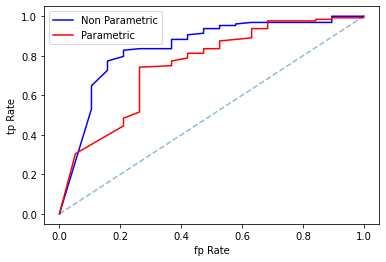

In [412]:
thresholds=np.arange(-100,100,0.05)
xNonPara,yNonPara=[],[]
xPara,yPara=[],[]
for thre in thresholds:
    y_pred=model.predict(X_test.to_numpy(),thre)
    tp,tn,fp,fn=evaluate(y_test.to_numpy(),y_pred)
    xNonPara.append(fp/(fp+tn))
    yNonPara.append(tp/(tp+fn))    
    y_pred=model.gaussian_predict(X_test.to_numpy(),thre)
    tp,tn,fp,fn=evaluate(y_test.to_numpy(),y_pred)
    xPara.append(fp/(fp+tn))
    yPara.append(tp/(tp+fn))
    plt.plot([0, 1], [0, 1], "--", alpha=0.5)
    plt.plot(xNonPara,yNonPara,'-',color="blue",label="Non Parametric")
    plt.plot(xPara,yPara,'-',color="red",label="Parametric")
    plt.xlabel("fp Rate")
    plt.ylabel("tp Rate")
    plt.legend()
    plt.show()
    
    


### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


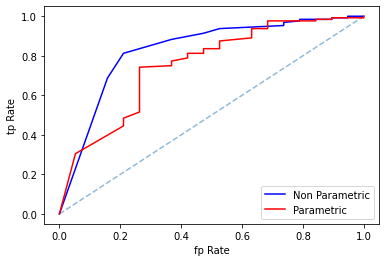

In [413]:
a,b=model.fit_params(X_train.to_numpy(), y_train.to_numpy(),5)
xNonPara,yNonPara=[],[]
xPara,yPara=[],[]
for thre in thresholds:
    y_pred=model.predict(X_test.to_numpy(),thre)
    tp,tn,fp,fn=evaluate(y_test.to_numpy(),y_pred)
    xNonPara.append(fp/(fp+tn))
    yNonPara.append(tp/(tp+fn)) 
    y_pred=model.gaussian_predict(X_test.to_numpy(),thre)
    tp,tn,fp,fn=evaluate(y_test.to_numpy(),y_pred)
    xPara.append(fp/(fp+tn))
    yPara.append(tp/(tp+fn))
plt.plot([0, 1], [0, 1], "--", alpha=0.5)
plt.plot(xNonPara,yNonPara,'-',color="blue",label="Non Parametric")
plt.plot(xPara,yPara,'-',color="red",label="Parametric")
plt.xlabel("fp Rate")
plt.ylabel("tp Rate")
plt.legend()
plt.show()

### OT3.Shuffle the database, and create new test and train sets. Redo the entire training and evaluation process 10 times (each time with a new training and test set). Calculate the mean and variance of the accuracy rate.


In [414]:
n_round=10
lst_accuracy=[]
for i in range(n_round):                                                                                                         #########
    X_train, X_test, y_train, y_test=train_test_split(df.loc[:, ~df.columns.isin(['Attrition'])],df["Attrition"],test_size=0.1,shuffle=True)
    X_train_leave = X_train.loc[df["Attrition"] == 1.0].copy()
    X_train_stay  = X_train.loc[df["Attrition"] == 0.0].copy()
    OT3model = SimpleBayesClassifier(n_pos =X_train_leave.shape[0] , n_neg = X_train_stay.shape[0])
    a,b=model.fit_params(X_train.to_numpy(), y_train.to_numpy())
    y_pred = model.predict(X_test.to_numpy())
    tp,tn,fp,fn=evaluate(y_test.to_numpy(),y_pred)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("round",i+1,"accuracy : ",accuracy)
    lst_accuracy.append(accuracy)
print(np.mean(lst_accuracy))   
print(np.var(lst_accuracy))
    

round 1 accuracy :  0.8231292517006803
round 2 accuracy :  0.7891156462585034
round 3 accuracy :  0.7959183673469388
round 4 accuracy :  0.8503401360544217
round 5 accuracy :  0.8095238095238095
round 6 accuracy :  0.8095238095238095
round 7 accuracy :  0.8435374149659864
round 8 accuracy :  0.8503401360544217
round 9 accuracy :  0.8163265306122449
round 10 accuracy :  0.8367346938775511
0.8224489795918368
0.0004391688648248413
